#    Tuberculosis Chest X-Ray Image Classification: A Deep Learning Approach

##### Tamiru Berhanu-Denka

## Overview 

> A total of 985 tuberculosis and 3500 normal chest x-ray images were used to train a Convolutional Neural Networks (CNN) for the identifcation and classifaction of Tuberculosis. A CNN model was developed with the aim of accurately predicting whether there is tuberculosis or not in the lungs. Multiple models in an  iterative approach was built so as to compare multiple results and select the highest accuracy and recall score.

> The modeling started by using simple neural network (single perceptron model) as a baseline, and multiple CNN models are used by iterating over previous model. Various layers were used in the CNN model to find a model with the highest accuracy and recall scores, so that it can correctly distinguish between Normal and Tuberculosis x-ray images.

> The final model output has a 98.66% accuracy score and 98.07% recall on the unseen chest x-ray images. I recommend that the output from this model can be used as a dagnostic tool along with other tuberculosis diagnostic aides for clinicians and researchers. This model could be beneficial since the model accuratletly identifies tuberculosis 98.66% of the time while avoiding false negative results 98.07% of the time.

## Business Understanding

> One of the very old disease affecting humans all over the world, causing significant cause of morbidity and mortality is Tuberculosis(TB). Tuberculosis is caused by a bacterial group named Mycobacteria particularly Mycobacterium tuberculosis complex. According to the World Health Organization(WHO), a total of 1.5 million people died from TB in 2020 (including 214000 people with HIV). Worldwide, TB is the 13th leading cause of death and the second leading infectious killer after COVID-19 (above HIV/AIDS). In 2020, an estimated 10 million people fell ill with tuberculosis (TB) worldwide (5.6 million men, 3.3 million women and 1.1 million children). Tuberculosis is present in all countries and age groups. But TB is curable and preventable.

> In 2020, 1.1 million children fell ill with TB globally. Child and adolescent TB is often overlooked by health providers and can be difficult to diagnose and treat. Increases in the overall age of the population and the rise of drug-resistant TB have reinforced the need for rapid diagnostic improvements and new modalities to detect TB and drug-resistant TB, as well as to improve TB control. Resource limtiation realted to the diagnosis of patients in developing countries has worsen the disease. Artificial Intelligence (AI) models are being used as a diagnostic aid in many places. Excellent accuracy of the deep learning approach has been widely accepted and used in medical image classification applications. Many recent works based on deep learning technology have promoted the development of intelligent diagnostic systems, which can help human experts make better decisions about patients’ health. 

> In this project, a neural network model was developed to predict whether a chest x-ray image has tuberculosis or not using AI algorithms. The model output from this project can be ued to support the diagnosis of tuberculosis by pulmonologist, radiologists and other medical professionals. The risk of "false negative" result is one of the major side effect of x-ray diagnosis which potentially complicate diagnosis of tuberculosis. Henceforth, addressing the issue of "false negative" outcome is the primary target of this study. Briefly, a "false negative" result is explained as classifcation of an x-ray image as normal when actually the image is from a tuberculosis patient. Decreasing the chance of "false negative" result (recall) while obtaining a high accuracy is an objective in this study. Evaluating the model based on the recall score allows to determine the status of false negative and accuarcy score(to predict all x-ray images accuarately). An ROC curve (receiver operating characteristic curve) - AUC (Area under the ROC Curve) was also calculated to determine the performance of a classification model at all classification thresholds. Henceforth, the recall score, accuracy score, and ROC-AUC are the metrices used in this project.

## Data Understanding

> A total of 985 CXR images from Tuberculosis patients was collected follwing procedural authorization request at the The National Institute of Allergy and Infectious Diseases (NIAID). The pictures are loacted at the NIH/NIAID TB portal (https://sharingwith.niaid.nih.gov/browse/shares/646).
Normal CXR images of 3500, was also downloaded  from the RSNA CXR dataset: RSNA pneumonia detection challenge dataset ( https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data. A  total of 4485 Chest X-rays labelled as either tuberculosis(985) or normal(3500) were used for in this study. In order to minimize the preprocessing time, each x-ray image were set at a uniform pixel of 64x64 befroe modeling.


## Data Preparation

### Loading Useful Packages

In [63]:
#Importing important libraries to be sued

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image


from tensorflow.keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification
# Neural network libraries
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [64]:
# Create fucntion to show model development and various metrics
# I have got the below code form  code from this https://www.kaggle.com/alosdevalon/cnn-pneumonia-diagnosis
def show_metrics(history):
    results = history.history
    plt.figure()
    plt.plot(results['val_accuracy'], label = 'Validation Accuracy')
    plt.plot(results['accuracy'], label = 'Train Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();
    
    plt.figure()
    plt.plot(results['val_recall'], label = 'Validation Recall')
    plt.plot(results['recall'], label = 'Train Recall')
    plt.title('Recall Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.show();
     
    plt.figure()
    plt.plot(results['val_loss'], label = 'Validation Loss')
    plt.plot(results['loss'], label = 'Train Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show();

In [66]:
# Create function to display confusion matrices for each model
def conf_mat(model):
    y_pred = model.predict(test_set)
    y_pred = (y_pred>0.5).astype(np.int)
    display=(ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_pred), display_labels=['Normal', 'Tuberculosis']).plot())

## Data Loading 

> On the cxr image data available here, a split into a training set ( 80% of the data) and a test set ( 20%) was perfromed. The training data set is used to train the neural network; whereas the remaining 20% of the data is used as validation dataset.

In [67]:
# Set path to were dataset is saved (directory chest_xray image data-CXRImage Data) for train and test sets
train_path = 'CXRImageData/'
test_path = 'CXRImageData/'

# Set a path within train dataset to both classes (NORMAL/TB)
train_n_path = train_path +'Normal/'
train_tb_path = train_path +'TB/'

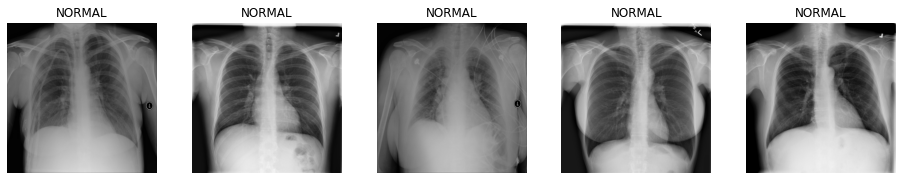

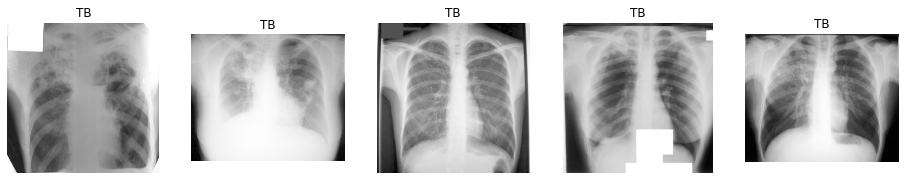

In [68]:
# View the first 5 images in train set for both TB and normal
#I got the belowcode from https://www.kaggle.com/b3d1rhan/pneumonia-detector-deeplearning
plt.figure(figsize=(16,16))
for n in range(5):
    Normal_img = os.listdir(train_n_path)[n]
    Normal_address = train_n_path+Normal_img
    Normal_load = Image.open(Normal_address)
    ax = plt.subplot(5,5,n+1)
    plt.imshow(Normal_load, cmap ='gray')
    plt.title("NORMAL")
    plt.axis("off")

plt.figure(figsize=(16,16))
for n in range(5):
    TB_img =  os.listdir(train_tb_path)[n]
    TB_img_address = train_tb_path+TB_img
    TB_load = Image.open(TB_img_address)
    ax = plt.subplot(5,5,n+1)
    plt.imshow(TB_load, cmap ='gray')
    plt.title("TB")
    plt.axis("off")

> As part of the preporcessing step, before passing image data to the neural network, scaling of x-ray (greyscale) image data was performed by dividing by 255. Image size was also set at 64 x 64 pixels to maintain uniformity. 
> Using ImageDataGenerator a 80%-20% split on the train test was applied to get the train set  and validation set respectively. Since it ia binary classifcation, Normal vs. Tuberculosis images will be predicted.

In [69]:
# Utlize ImageDataGenerator from keras.preprocessing
# I got the below code from stackoverfalw https://stackoverflow.com/questions/55963087/
#in-keras-imagedatagenerator-is-validation-split-parameter-a-kind-of-k-fold
img_dgen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)

# Creation of train set, note the subset argument due to the validation split
train_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

# Creation of validation set from 20% of the train data
validation_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

# Creation of test set from the test path, shuffle set to false for use in future model predictions
test_set = img_dgen.flow_from_directory(test_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False)

Found 3588 images belonging to 2 classes.
Found 897 images belonging to 2 classes.
Found 4485 images belonging to 2 classes.


## Modeling 

>The principle behind image classifcation is  that computers will look for the features at the base level. These base level features are the curvatures and boundaries. In this way by using several different layers such as the convolutional layers and the pooling layers, the computer extracts the base level features from the images. 

>Performance of the models will be measured using accuracy and recall scores. The AUC value also used to determine the prediction. A loss value  was also evaluated before training the network, in order to quantify how “good” the model is doing so that it can try to do “better”.

>Tuberculosis, being transmissible and dangerous disease, it is highly important to avoid a false negative results. False negative result could potentially identyfy individauls as 'healthy' and aggravate the transmission of the disease in the population. Therefore, the recall score is very important in this analsys as it is a dirct measure of false negative
results.

## Simple Neural Network Model 

> It is known that a Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. As shown below, simple Sequential model was used including two types of layers(Dense and Flatten).
> Dense Layer is used to create a deeply connected layer in the neural network where each of the neurons of the dense layers receives input from all neurons of the previous layer. The Flatten Layers is used to flatten the input.
> Activation functions, Sigmoid and ReLU are used in this modeling. Genrerally, Activation Functions are used to determine the output of a neural network. It determines whether a particular neuron should be activated (“fired”) or not. These are usually non-linear functions that are performed on the input signals. This transformed output is then sent as an input to the next layer of neurons. There are several activation functions but only ReLU and the final activation, Sigmoid were used to pridict the tuberculosis and normal chest x-ray images. Binary crossentropy, as the loss funcation is also used. The loss function was claculated using Binary Crossentropy, in which it compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value.


> To get the maximum accuracy out of a neural network model,  it is always advisable to pick the right optimizer with the right parameters. Various literatures has shown the use of Adam over stochastic gradient descent(SGD)(https://openreview.net/pdf?id=SJx37TEtDH; https://ramseyelbasheer.io/2021/06/20/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd/). Another study by Ashia C. Wilson et al., 2018 also suggestes to reconsider the use of Adam in neural networks(https://arxiv.org/pdf/1705.08292.pdf) explaining the generlization issue as " solutions found by adaptive
methods generalize worse (often significantly worse) than SGD, even when these solutions have better training performance".
For this modeling , I have compared both Adam and SGD. The accuracy and recall socres were higher in all times where the optimzation was using Adam. Therefore, Adam, an optimization algorithm was selected based on the performace for image classifcation. The Adam optimizer makes use of a combination of ideas from other optimizers. It uses an exponentially decaying average of past gradients. Adam also employs an exponentially decaying average of past squared gradients in order to provide an adaptive learning rate.  

> During the data generation setep, images were resized to 64 X 64 pixel and used as imput shape.

Sources:
1. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#h2_4
2. https://machinelearningknowledge.ai/different-types-of-keras-layers-explained-for-beginners/#:~:text=Important%20Keras%20Layers%20API%20Functions%20Explained%201%20Dense,...%208%20Pooling%20Layer.%20...%20More%20items...%20


In [70]:
# Creatiing simple neural network model
simple_model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),
    layers.Dense(20, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
simple_model.compile(optimizer='Adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

In [71]:
simple_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                81940     
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 82,133
Trainable params: 82,133
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Fit the train_set data to the simple model built above and use validation set
simple_history = simple_model.fit(train_set,
        epochs=10, 
        batch_size=32,
        validation_data=validation_set)

Epoch 1/10
113/113 [==============================] - 81s 721ms/step - loss: 0.2637 - accuracy: 0.8930 - recall: 0.6650 - auc: 0.9324 - prc: 0.8324 - val_loss: 0.1817 - val_accuracy: 0.9264 - val_recall: 0.8782 - val_auc: 0.9754 - val_prc: 0.9335
Epoch 2/10
113/113 [==============================] - 81s 720ms/step - loss: 0.1657 - accuracy: 0.9353 - recall: 0.8135 - auc: 0.9727 - prc: 0.9248 - val_loss: 0.1500 - val_accuracy: 0.9353 - val_recall: 0.8934 - val_auc: 0.9838 - val_prc: 0.9555
Epoch 3/10
113/113 [==============================] - 83s 731ms/step - loss: 0.1603 - accuracy: 0.9351 - recall: 0.8261 - auc: 0.9752 - prc: 0.9303 - val_loss: 0.1297 - val_accuracy: 0.9498 - val_recall: 0.8528 - val_auc: 0.9852 - val_prc: 0.9571
Epoch 4/10
113/113 [==============================] - 142s 1s/step - loss: 0.1411 - accuracy: 0.9445 - recall: 0.8617 - auc: 0.9808 - prc: 0.9452 - val_loss: 0.1653 - val_accuracy: 0.9342 - val_recall: 0.7411 - val_auc: 0.9844 - val_prc: 0.9522
Epoch 5/10
113

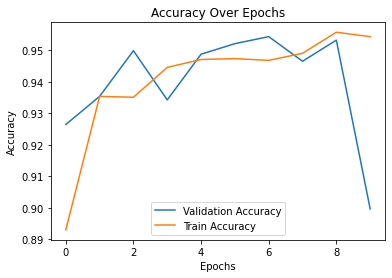

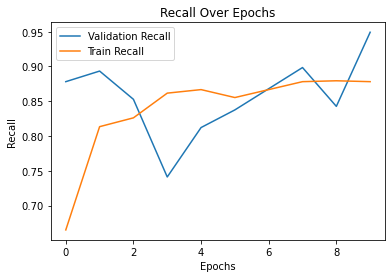

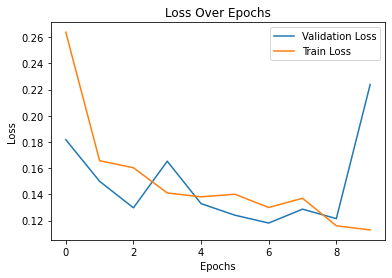

In [73]:
show_metrics(simple_history)

In [74]:
simple_model.evaluate(test_set)

141/141 [==============================] - 78s 554ms/step - loss: 0.2166 - accuracy: 0.9081 - recall: 0.9736 - auc: 0.9860 - prc: 0.9534


[0.21661259233951569,
 0.9081382155418396,
 0.9736040830612183,
 0.9859578013420105,
 0.9534056186676025]

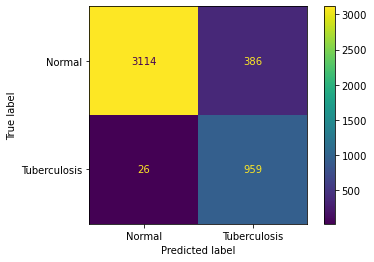

In [75]:
conf_mat(simple_model)

> The simple model above resulted a recall score, 97.36% and accuracy of 90.81%. This shows that the model needs to be improved to elevate both the accurayc and recall socres. Increasing both scores, helps the model to accurately classify images without missing flase negative results. Using this simple model as a baseline model, a convolutional neural netork model will be applied and see the socres.  

## Convolutional Neural Network(CNN) Model

> By the virtue that, unlike humans who visualize and characterize images based on color and size, computers use numbers which are called pixels. A pixel has a value between 0 and 255. Considering this numercal pixel values as a data, the machine use this numercal data to derive the features or patterns that used to differntaite one image form the other. Convolutional Neural Networks is used to build algorithms that are capable of deriving the specific pattern from images.

> Among several types of layers used in CNN model; Input Layer, Convolutional Layer, Pooling Layer, Fully Connected Layer, Output Layer and  Activation Functions are used in this model creation.
The input layer is the layer in which the input image will be fed into the CNN model. In this modling I used an input hsape of (64, 64, 1) but depending upon our requirement, we can reshape the image to different sizes.

> The Convolutional Layer consists of a filter (also known as a kernel) with a fixed size. This operation of Convolution is performed between the input image and the filter. This is the stage in which most of the base features such as sharp edges and curves are extracted from the image and hence this layer is also known as the feature extractor layer.
> Pooling Layer is also known as downsampling where the spatial volume of the x-ray image is reduced. For instance if, if we perform a Pooling operation with a stride of 2 on an image with dimensions 28×28, then the image size reduced to 14×14, it gets reduced to half of its original size. 
> Fully Connected Layer (FC) is placed just before the final classification output of the CNN model. These layers are used to flatten the results before classifying. Flattening a tensor means to remove all of the dimensions except for one. This is exactly what the Flatten layer does.
> Activation Function, Sigmoid and  Adam optimizer were used as a final one to predict the x-ray images.


> Sources:https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/
https://mlfromscratch.com/optimizers-explained/#momentum
https://www.upgrad.com/blog/image-classification-in-cnn/

In [76]:
# I added aditional two Conv2d layers at different levels, as well as a max pooling layer after each. 
# got this line of code form https://www.kaggle.com/alosdevalon/cnn-pneumonia-diagnosis.
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])



In [77]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                802880    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [78]:
cnn_history = cnn_model.fit(train_set,
epochs=10, 
batch_size=32, 
validation_data=validation_set)

Epoch 1/10
113/113 [==============================] - 82s 728ms/step - loss: 0.2651 - accuracy: 0.8902 - recall: 0.6421 - auc: 0.9277 - prc: 0.8321 - val_loss: 0.1533 - val_accuracy: 0.9454 - val_recall: 0.8680 - val_auc: 0.9765 - val_prc: 0.9444
Epoch 2/10
113/113 [==============================] - 82s 722ms/step - loss: 0.1290 - accuracy: 0.9537 - recall: 0.8718 - auc: 0.9824 - prc: 0.9516 - val_loss: 0.1302 - val_accuracy: 0.9565 - val_recall: 0.8883 - val_auc: 0.9797 - val_prc: 0.9555
Epoch 3/10
113/113 [==============================] - 82s 722ms/step - loss: 0.1035 - accuracy: 0.9629 - recall: 0.9010 - auc: 0.9893 - prc: 0.9691 - val_loss: 0.1027 - val_accuracy: 0.9699 - val_recall: 0.9086 - val_auc: 0.9883 - val_prc: 0.9692
Epoch 4/10
113/113 [==============================] - 82s 728ms/step - loss: 0.0764 - accuracy: 0.9752 - recall: 0.9327 - auc: 0.9929 - prc: 0.9806 - val_loss: 0.1025 - val_accuracy: 0.9610 - val_recall: 0.9137 - val_auc: 0.9866 - val_prc: 0.9724
Epoch 5/10
1

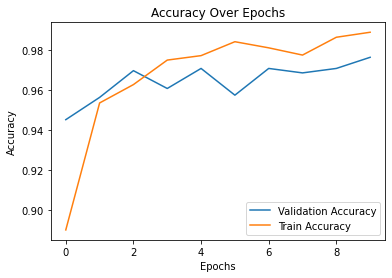

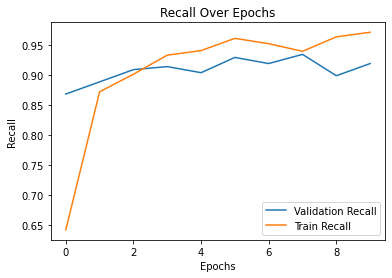

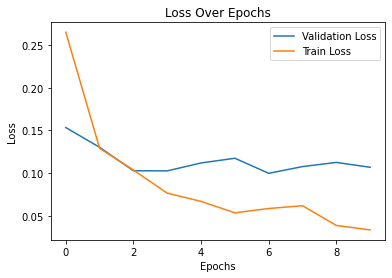

In [79]:
show_metrics(cnn_history)

In [80]:
cnn_model.evaluate(test_set)

141/141 [==============================] - 79s 559ms/step - loss: 0.0374 - accuracy: 0.9918 - recall: 0.9726 - auc: 0.9968 - prc: 0.9941     - ETA: 5s - loss: 0.0152 - accuracy: 0.9971 - recall: 0.0000e+00 -


[0.037400081753730774,
 0.9917502999305725,
 0.972588837146759,
 0.9967844486236572,
 0.9941421747207642]

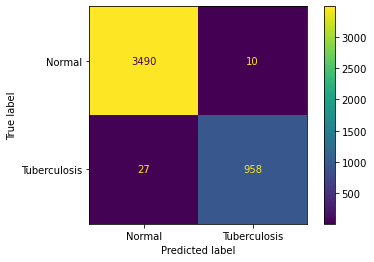

In [81]:
conf_mat(cnn_model)

> An accuracy score of 99.18%  and recall score of 97.26% was recorded from the first CNN model. This result is encouragning compared to the first Simple model in which a socre of 90.81% -  and 97.36% was recorded for accuracy and recall respectively.   Maxumum accuaracy and recall score is mandatory for a such clinical imagig study and another CNN model will be perofrmed by adding exta Dropout layer. Dropout Layer is one of the most popular regularization techniques to reduce overfitting. Overfitting in the model occurs when it shows more accuracy on the training data but less accuracy on the test data or unseen data.
>Source:https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/

In [82]:
#Running the Second cnn model with the objective of improving the recall score

cnn2_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])


cnn2_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])




In [83]:
cnn2_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [84]:
cnn2_history = cnn2_model.fit(train_set,
                    epochs=10,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/10
113/113 [==============================] - 82s 729ms/step - loss: 0.2551 - accuracy: 0.9016 - recall: 0.6764 - auc: 0.9333 - prc: 0.8405 - val_loss: 0.1671 - val_accuracy: 0.9398 - val_recall: 0.7513 - val_auc: 0.9782 - val_prc: 0.9456
Epoch 2/10
113/113 [==============================] - 82s 726ms/step - loss: 0.1367 - accuracy: 0.9487 - recall: 0.8503 - auc: 0.9802 - prc: 0.9462 - val_loss: 0.1508 - val_accuracy: 0.9398 - val_recall: 0.7360 - val_auc: 0.9803 - val_prc: 0.9614
Epoch 3/10
113/113 [==============================] - 85s 753ms/step - loss: 0.1131 - accuracy: 0.9635 - recall: 0.9010 - auc: 0.9863 - prc: 0.9608 - val_loss: 0.1032 - val_accuracy: 0.9666 - val_recall: 0.9036 - val_auc: 0.9871 - val_prc: 0.9690
Epoch 4/10
113/113 [==============================] - 85s 754ms/step - loss: 0.0956 - accuracy: 0.9688 - recall: 0.9112 - auc: 0.9905 - prc: 0.9678 - val_loss: 0.1028 - val_accuracy: 0.9666 - val_recall: 0.8782 - val_auc: 0.9896 - val_prc: 0.9716
Epoch 5/10
1

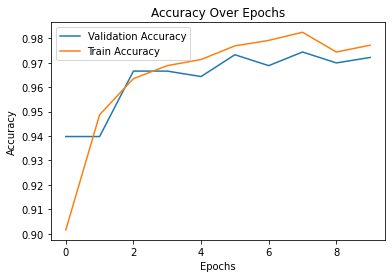

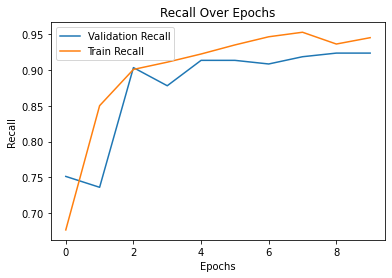

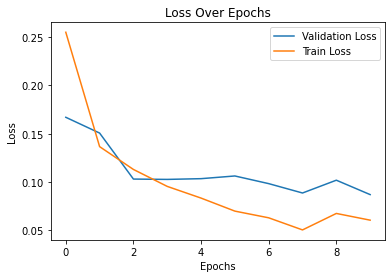

In [85]:
show_metrics(cnn2_history)

In [86]:
cnn2_model.evaluate(test_set)

141/141 [==============================] - 78s 556ms/step - loss: 0.0455 - accuracy: 0.9864 - recall: 0.9716 - auc: 0.9968 - prc: 0.9900


[0.045483097434043884,
 0.9863991141319275,
 0.9715735912322998,
 0.9968067407608032,
 0.9900270104408264]

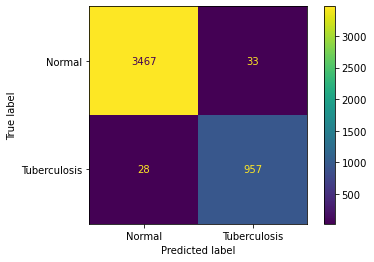

In [87]:
conf_mat(cnn2_model)

> Compared to the first CNN model recall score (97.26%), there is a slight decrease in the second one (97.16%). Hoever, An increase in the accuracy score was observed between the first and second CNN model(97.26% to 97.64%). Given the fact that both scores are good, another CNN modle will run to achieve the maximum recall score. Additional layers like Pooling and Dropout will be included. The number of epoches will also be increase. The number epoch equal to the number of times the algorithm sees the entire data set. So, each time the algorithm has seen all samples in the dataset, one epoch has completed.
>Source:https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

In [88]:
cnn3_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn3_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])



In [89]:
cnn3_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)        

In [90]:
cnn3_history = cnn3_model.fit(train_set,
                    epochs=15,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/15
113/113 [==============================] - 83s 731ms/step - loss: 0.3090 - accuracy: 0.8729 - recall: 0.5292 - auc: 0.9019 - prc: 0.7592 - val_loss: 0.1900 - val_accuracy: 0.9320 - val_recall: 0.7208 - val_auc: 0.9751 - val_prc: 0.9225
Epoch 2/15
113/113 [==============================] - 82s 727ms/step - loss: 0.1810 - accuracy: 0.9356 - recall: 0.8223 - auc: 0.9673 - prc: 0.9028 - val_loss: 0.1309 - val_accuracy: 0.9543 - val_recall: 0.8985 - val_auc: 0.9811 - val_prc: 0.9459
Epoch 3/15
113/113 [==============================] - 83s 735ms/step - loss: 0.1320 - accuracy: 0.9526 - recall: 0.8744 - auc: 0.9828 - prc: 0.9466 - val_loss: 0.1267 - val_accuracy: 0.9621 - val_recall: 0.8731 - val_auc: 0.9846 - val_prc: 0.9614
Epoch 4/15
113/113 [==============================] - 85s 753ms/step - loss: 0.1055 - accuracy: 0.9618 - recall: 0.9061 - auc: 0.9890 - prc: 0.9686 - val_loss: 0.1024 - val_accuracy: 0.9654 - val_recall: 0.8985 - val_auc: 0.9862 - val_prc: 0.9717
Epoch 5/15
1

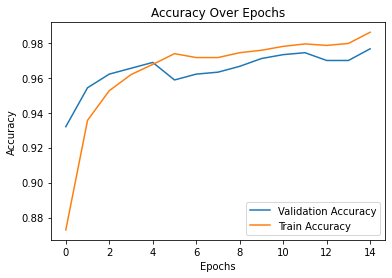

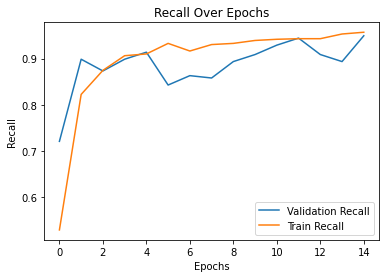

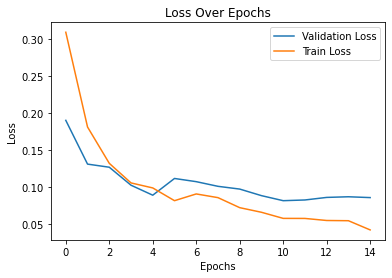

In [91]:
show_metrics(cnn3_history)

In [92]:
cnn3_model.evaluate(test_set)

141/141 [==============================] - 79s 559ms/step - loss: 0.0458 - accuracy: 0.9866 - recall: 0.9807 - auc: 0.9970 - prc: 0.9907


[0.04580339789390564,
 0.9866220951080322,
 0.9807106852531433,
 0.9970399141311646,
 0.9907191395759583]

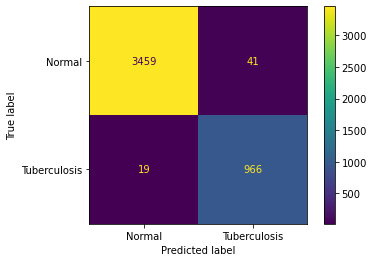

In [93]:
conf_mat(cnn3_model)

> Among all the models, the thrid CNN one has the highest recall scores of 98.07% and the accuracy score of 98.66% which is slightly lower than the accuracy socre of 99.18% of the first cnn model. This can be explained as the changes I made in this model including, increasing the number of epoches, adding addional layers of the pooling and dropout has enhanced the increase in the overall recall score while maintaining the the realtive higher accuracy score. The trade of between accuracy and recall scores were evaluated in each model and the model with the the maximum ability to find all the tuberculosis cases within a dataset was selected. Therefore, the third CNN model is the model of choice.

## Conclusion

> Compared to all models, the highest recall scores of 98.07% was recored on the third CNN model. This implies that, 98.07% of the time the radiologist or the physician could minimize the false negative error. Maximum reduction of false negative error is mandatory to avoid misdiagnosing the patients with Tuberculosis as being healthy, which would lead the patient to spread the bacteria to the healthy population. This in turn helps to   spread of tuberculosis. The accuracy socre of 98.66% also indicates, how radiologists/physicians can accurately classify the tuberculosis x-ray image from the normal one. Overall, the model result shows the diagnositc power of deep learning in correctly classifying TB chest x-ray images. Thus, I recommend the radiologists and pulomonlogists to use this model as a primary decision tool in their rountine Tuberculosis screening especially in multidrug resistant tuberculosis. I also recommend the Center for Infectious Disease Imaging (CIDI) at NIAID/ NIH and the World Health Organization to use this information in their Tuberculosis diagnosis gudeline and resrarch agenda.

## Next Step

> Maintaining the current scores, another model cudld be processed. Therefore, the next step will be getting more data collected from differnt parts of the world from patients at differnt clinical stages of tuberculosis with a better quality x-ray images. I also wanted to identify tberculosis based on causal agents other than the classical Mycobacterium tuberculosis and be able to compare and classify between them. Adjusting varous hyperparameters could potentially increase both accuracy and recall scores. 